In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import pickle
import yaml
from explainer import explainer
from custom_metric import custom_metric

from dotenv import load_dotenv
import os

%load_ext autoreload
%autoreload 2
%reload_ext autoreload


load_dotenv()



/Users/scottgregory/miniconda3/envs/tapes/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


True

In [14]:
ROOT_DIRECTORY = os.environ["ROOT_DIRECTORY"]
SCORE_YEAR = 2023
SCORE_ROUND = 8
MODEL = "automl_lgbm_30_nf_state"

with open(ROOT_DIRECTORY + "/src/config.yaml", "r") as stream:
    config_input = yaml.safe_load(stream)

FEATURE_SET = config_input["data"]["feature_set"]
TRAIN_COLUMNS = config_input["data"]["training"]["train_cols"]

with open(ROOT_DIRECTORY + "/models/" + MODEL + ".pkl", "rb") as f:
    automl = pickle.load(f)

### Explain current year
Focus is on overall charts


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  0%|          | 0/92 [00:00<?, ?it/s]The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  1%|          | 1/92 [00:00<00:17,  5.09it/s]The default of 'normalize

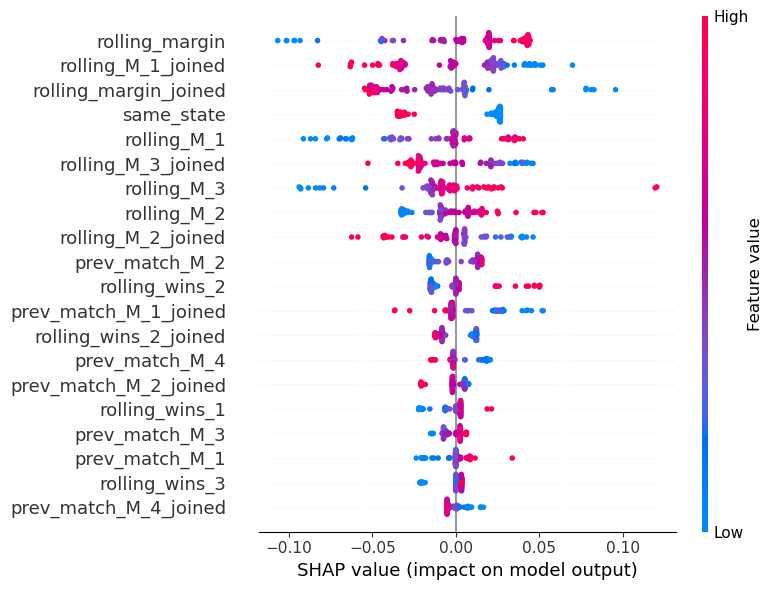

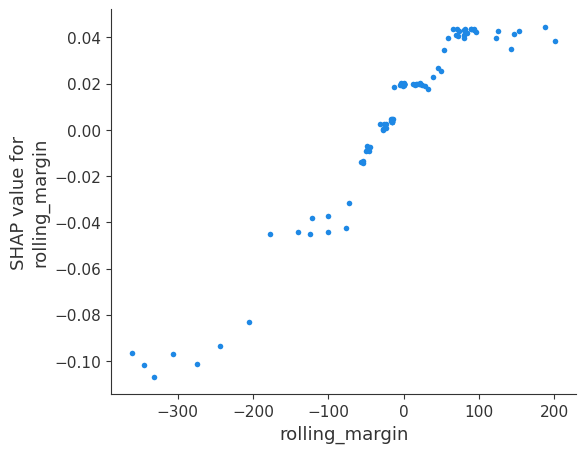

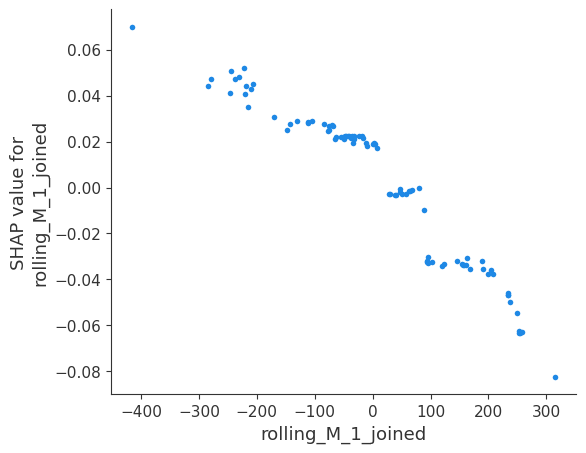

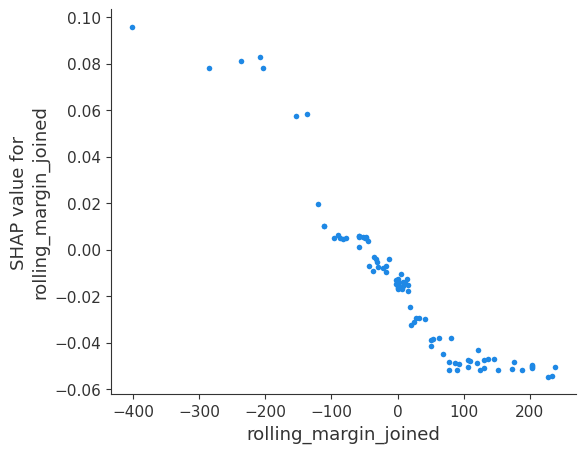

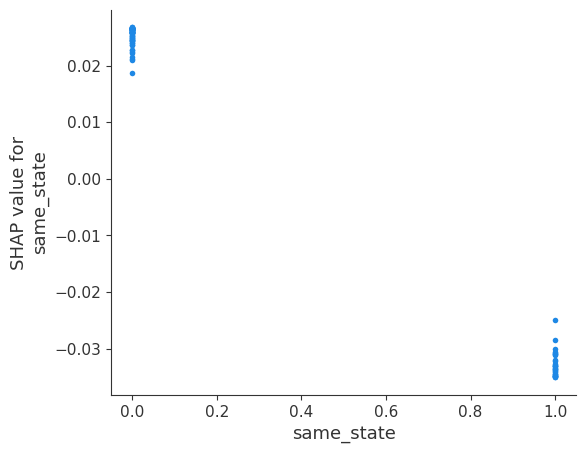

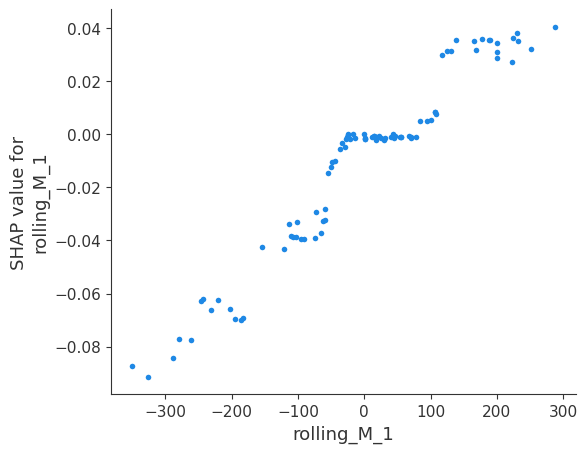

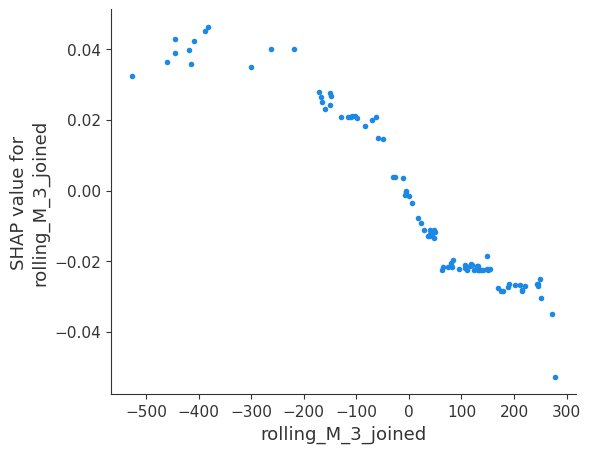

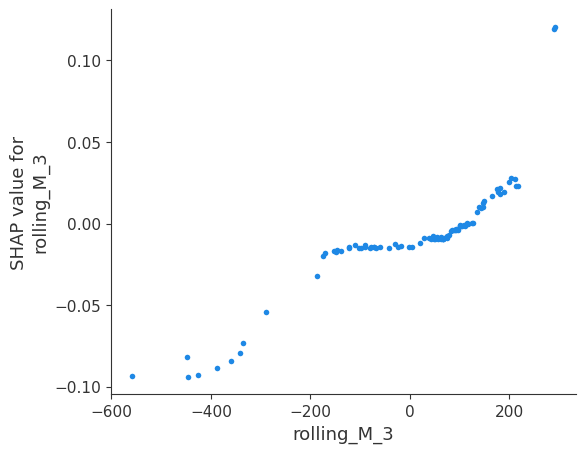

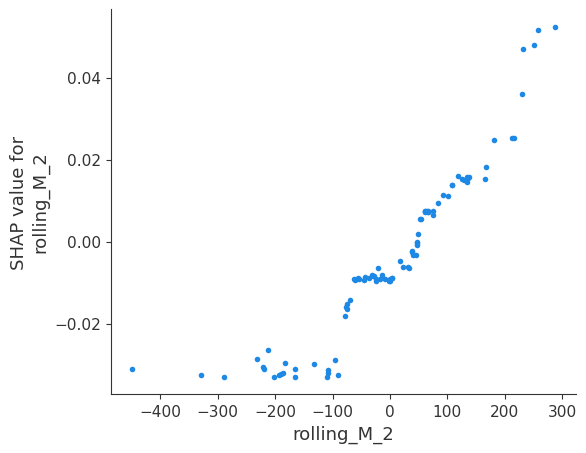

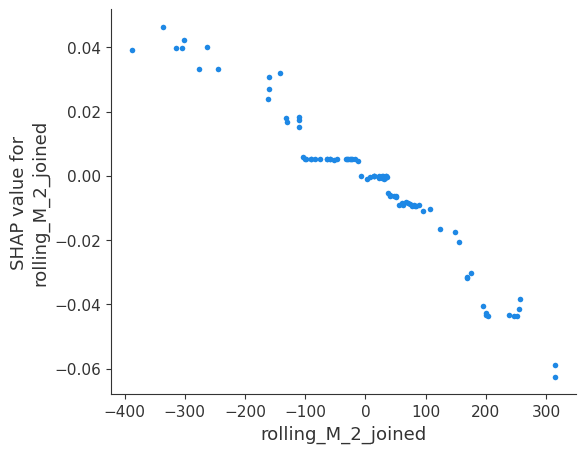

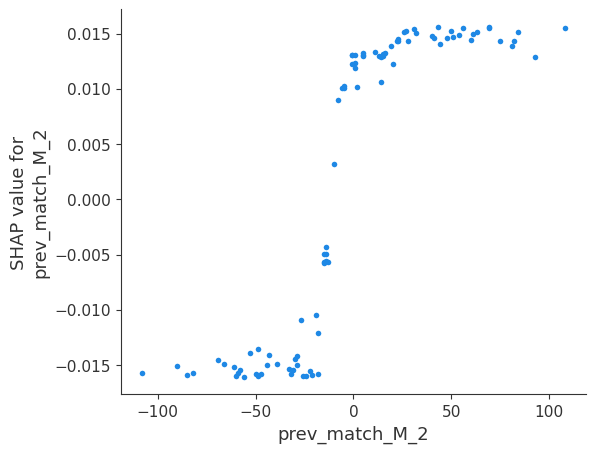

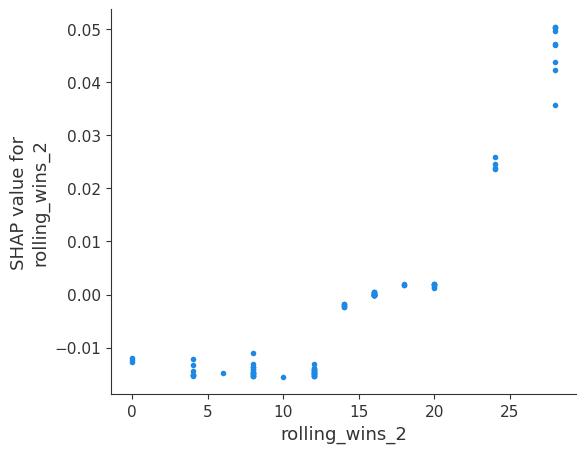

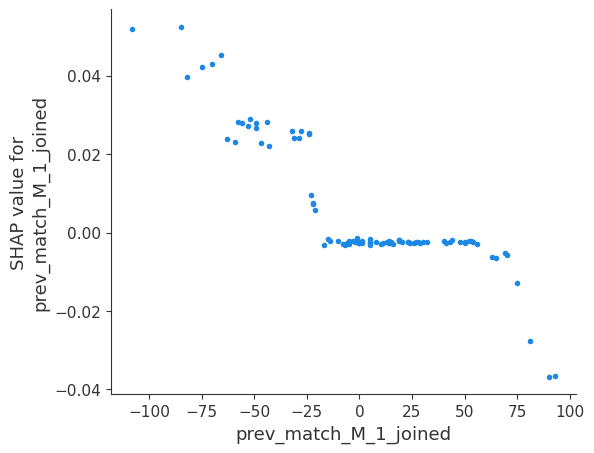

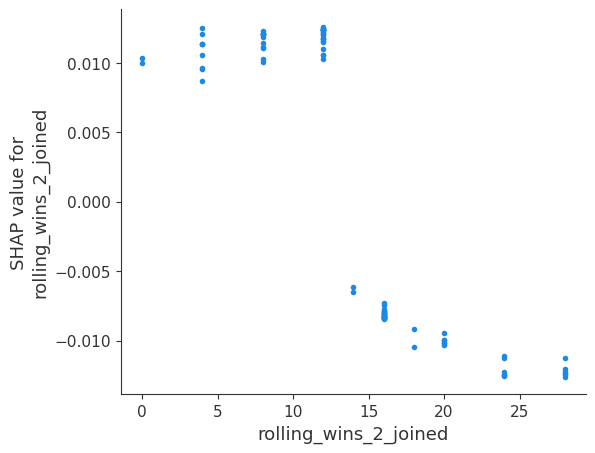

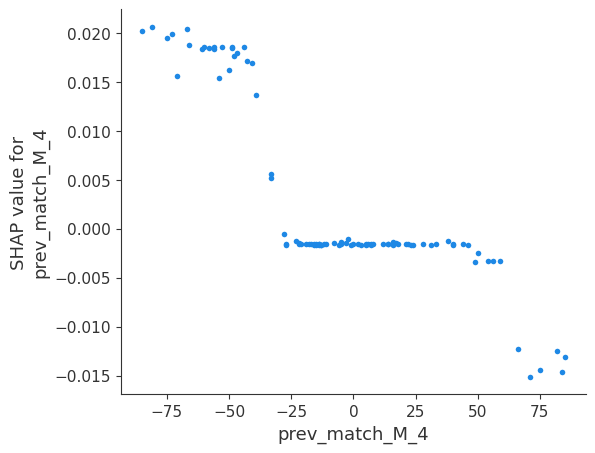

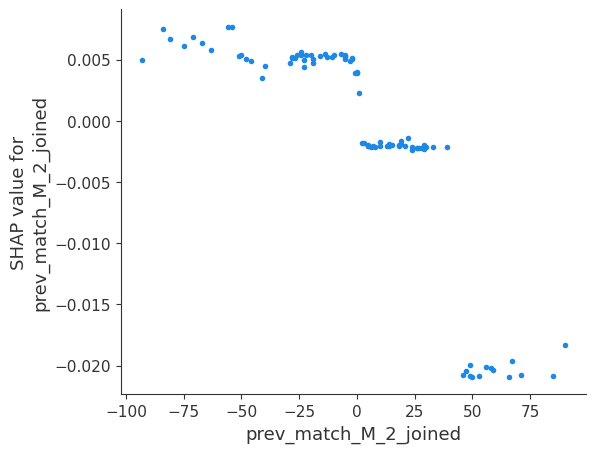

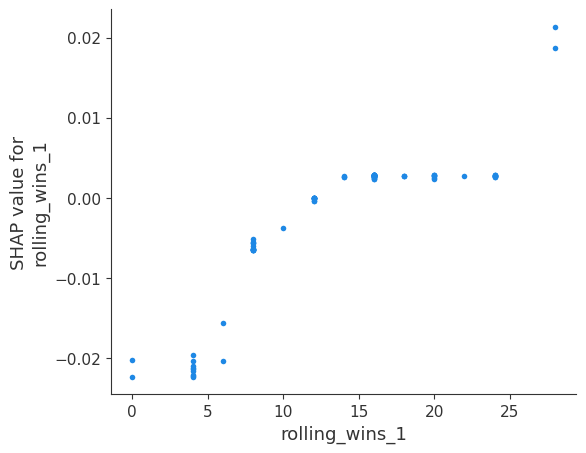

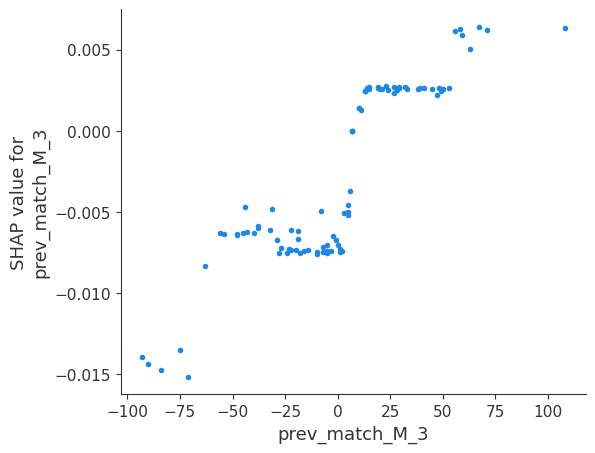

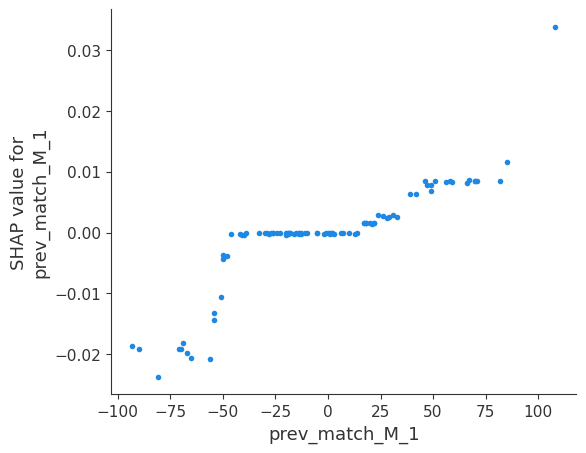

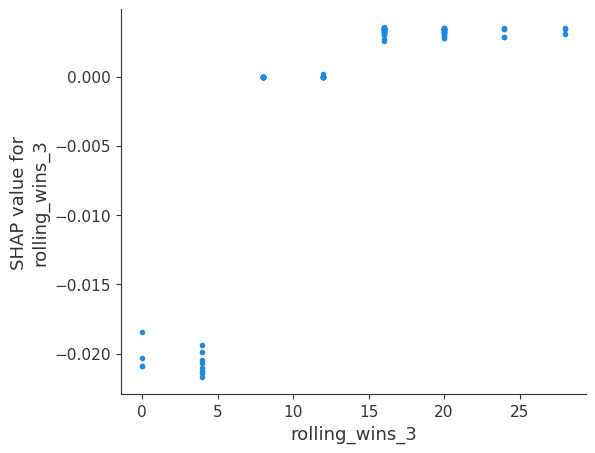

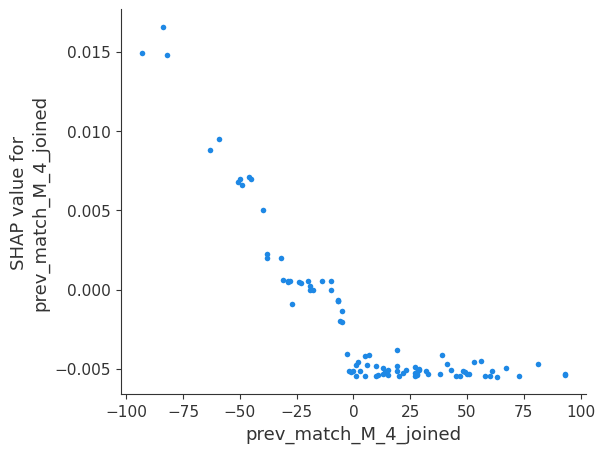

In [19]:
processed_features = pd.read_csv(ROOT_DIRECTORY + FEATURE_SET)
samples_to_assess = processed_features.loc[(processed_features['game_year']==SCORE_YEAR)]
samples_to_assess["score"] = automl.predict_proba(samples_to_assess[TRAIN_COLUMNS])[:, 1]
background_samples = processed_features.sample(30)
x = explainer(background_samples,samples_to_assess,automl,TRAIN_COLUMNS,20)
t = x.exp()

### Explain current round
Focus is on invidiual charts.  Use the above charts for global explanations.


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  0%|          | 0/11 [00:00<?, ?it/s]The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  9%|▉         | 1/11 [00:00<00:01,  5.71it/s]The default of 'normalize

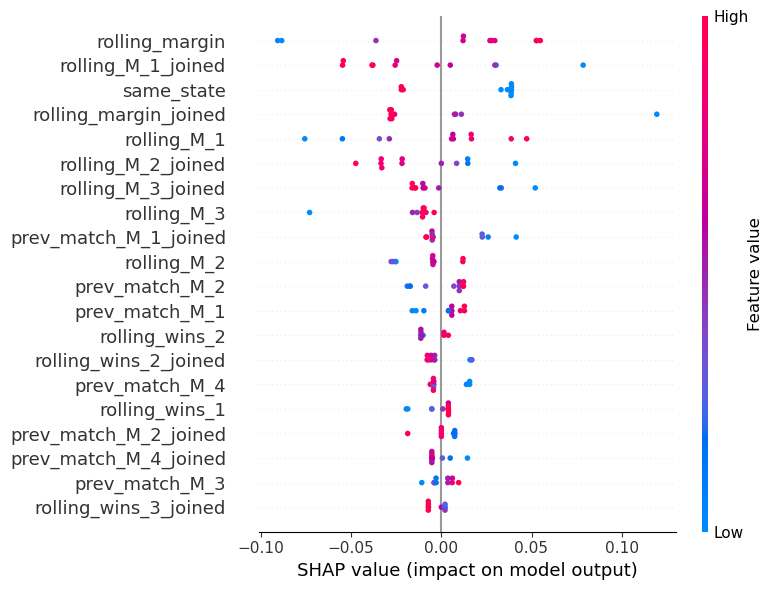

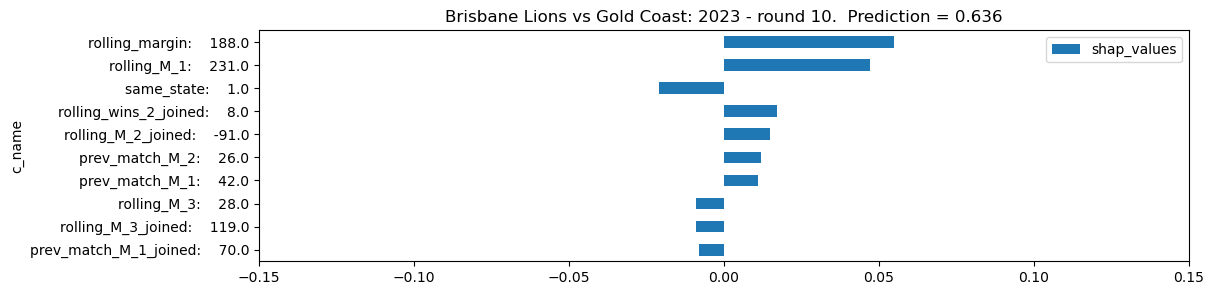

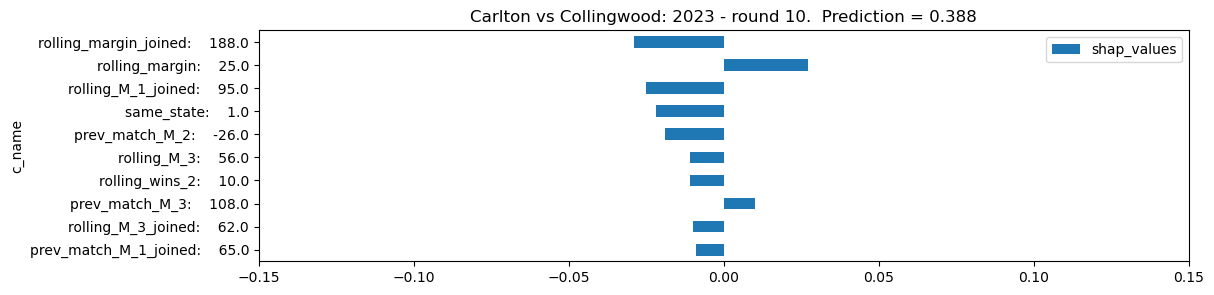

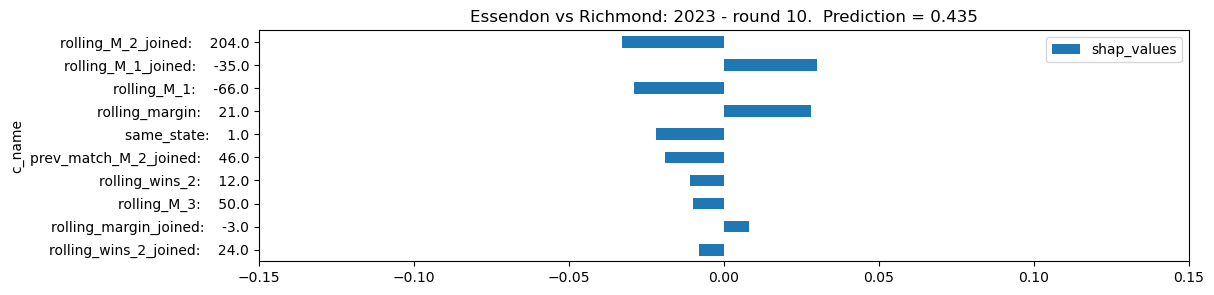

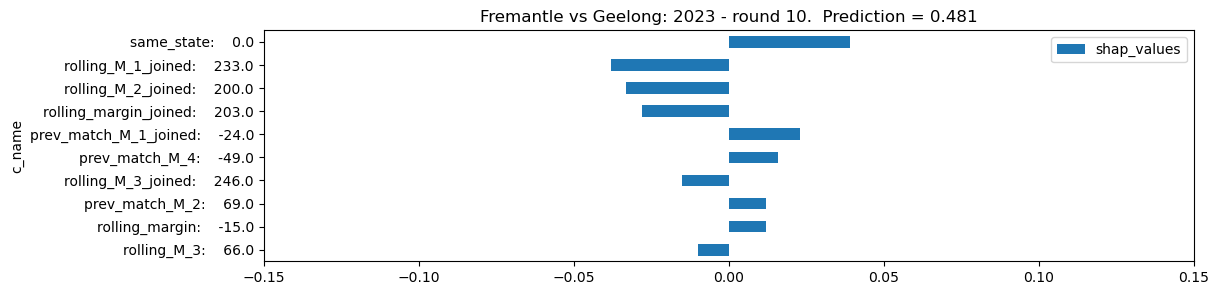

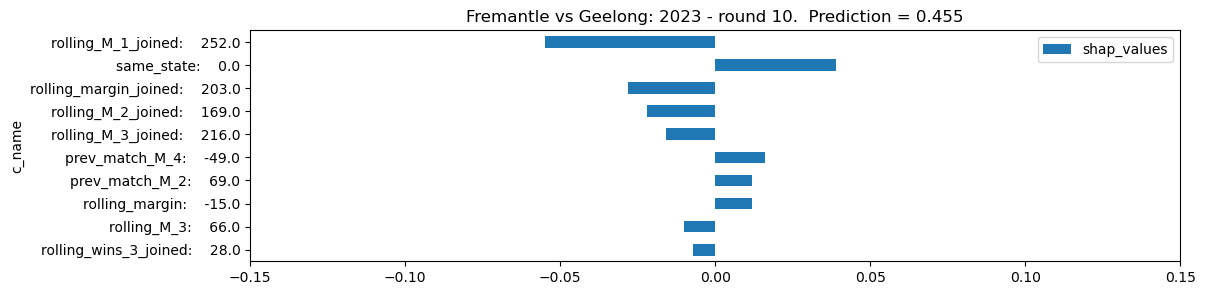

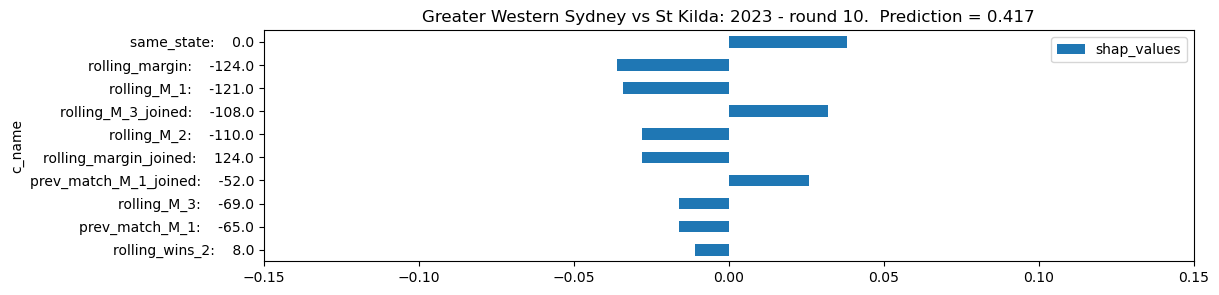

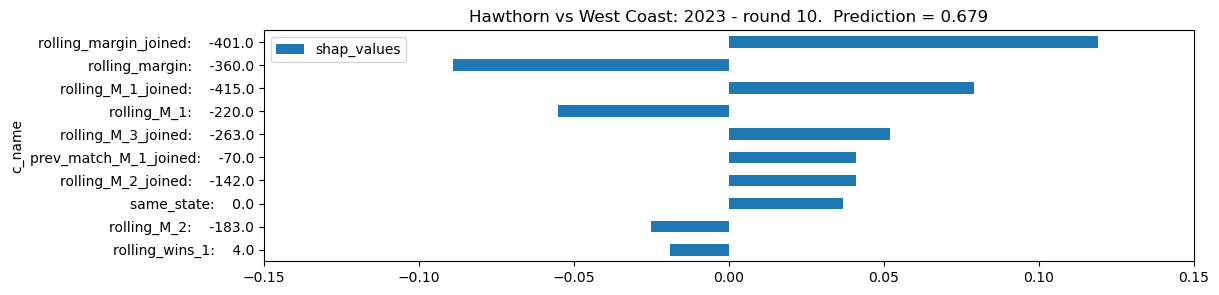

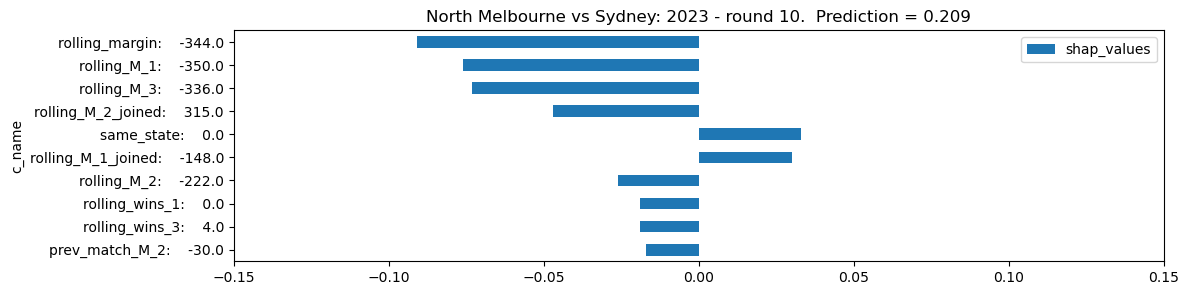

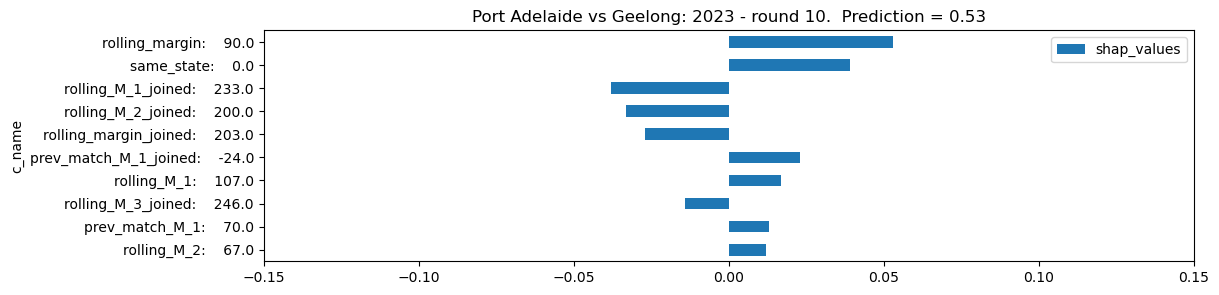

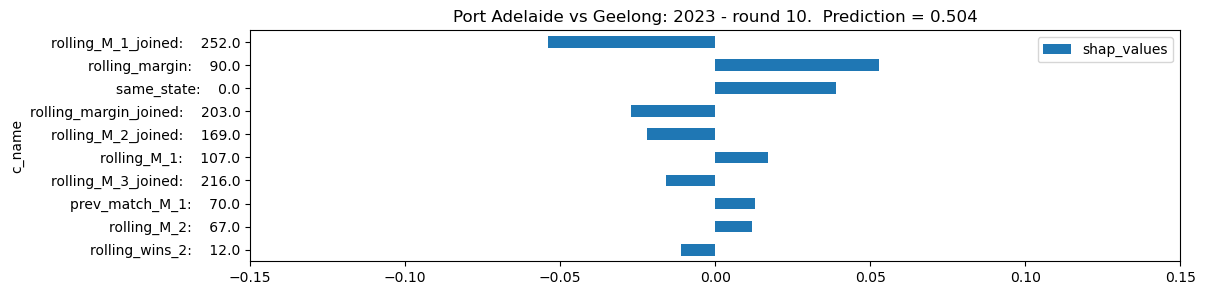

In [20]:
processed_features = pd.read_csv(ROOT_DIRECTORY + FEATURE_SET)
samples_to_assess = processed_features.loc[(processed_features['game_year']==2023) & (processed_features['round_num'] == 10)]
samples_to_assess["score"] = automl.predict_proba(samples_to_assess[TRAIN_COLUMNS])[:, 1]
background_samples = processed_features.sample(30)
x = explainer(background_samples,samples_to_assess,automl,TRAIN_COLUMNS,0)
t = x.exp()
x.individual_plotter()